Que2 : How would redefine the notion of ‘degree’ and ‘clustering coefficient’ for a weighted network to
account for the edge weights?




Taken data set is directed and weighted. So what I did is I make it undirected and if 2 differnt nodes are connected with 2 different direction then I assign both of them with same weighted edge so by this degree of all the edges are same. As weight of the edges are conscider as a degree of node which connects it. This is how degree is defined as new.


example:
a , b ,c ,d are 4 nodes so, here degree of a is 1+3 that is 4 which is
weight sum of  addjacent edges. likwise all have degree like that.
 
 
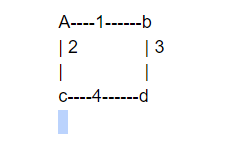

Loaded the weighted  directed graph and make it undirected by assigning same weights to bidirection of two nodes.

In [1]:
import pandas as pd
data = pd.read_csv('/content/que3.txt', sep=',') #data loaded

In [2]:
data.columns=["SOURCE", "TARGET", "RATING", "TIME"] #all the columns of the data

In [3]:
data#here data contains negtive weights

,SOURCE,TARGET,RATING,TIME
0,430,1,10,1376539200
1,3134,1,10,1369713600
2,3026,1,10,1350014400
3,3010,1,10,1347854400
4,804,1,10,1337572800
...,...,...,...,...
24180,7604,7601,10,1364270400
24181,7601,7604,10,1364270400
24182,7604,7602,10,1364270400
24183,7602,7604,10,1364270400


In [4]:
data=data.drop(["TIME"],axis=1) #drop the time column because it is not required

#RATING columns is the weight of the nodes

In [5]:
for i in range(len(data['RATING'])):
  data['RATING'][i]=abs(data['RATING'][i])

In [6]:
data

,SOURCE,TARGET,RATING
0,430,1,10
1,3134,1,10
2,3026,1,10
3,3010,1,10
4,804,1,10
...,...,...,...
24180,7604,7601,10
24181,7601,7604,10
24182,7604,7602,10
24183,7602,7604,10


In [7]:
df = pd.DataFrame({'SOURCE': list(data['SOURCE']),
                   'TARGET': list(data['TARGET']),
                   'RATING': list(data['RATING'])})

In [8]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('que3_data.csv', index=False) 

In [9]:
n=set(data['SOURCE']).union(set(data['TARGET']))  
print("total number of nodes in the graph is :",len(n))

total number of nodes in the graph is : 3782


In [10]:
adjancency_matrix= [[0 for i in range(max(n)+1)] for j in range(max(n)+1)] #adjancency matric for the graph

In [11]:

edge_list={}
for i in range(0,max(n)+1):
  edge_list[i]=[]
for i in range(0,len(data)):#initialise the adjancecncy matrix its value will be the weights of the graph
  if(data["SOURCE"][i]!=data["TARGET"][i]):   # dont assign the values if there is loop because we dont want any loop in graph
    adjancency_matrix[data["SOURCE"][i]][data["TARGET"][i]]=abs(data["RATING"][i])  #assign weights values in the graph
    adjancency_matrix[data["TARGET"][i]][data["SOURCE"][i]]=abs(data["RATING"][i] ) #and make the graph undirected
    edge_list[data["SOURCE"][i]].append(data["TARGET"][i])   #here make the edge list assign all the adjncent nodes to here in the edge list
    edge_list[data["TARGET"][i]].append(data["SOURCE"][i])


In [12]:
weighted_degree={}  #weighted degree is calculated here
weighted_degree_sum={}  #wighted sum of all the degree is caluclated here
for i in range(len(adjancency_matrix)):
  weighted_degree[i]=[]       #initialise with empty list
  weighted_degree_sum[i]=0     #intilaise sum with zero
  for j in range(len(adjancency_matrix[i])):
    if adjancency_matrix[i][j]>0:     #conceider the nodes adjncent only if the adjacency matrix value id greater then 0 as all the weights are assigned as positive here
      weighted_degree[i].append(adjancency_matrix[i][j]) 
  weighted_degree_sum[i]=sum(weighted_degree[i])

In [13]:
weighted_degree_frequncy={}  #frquncy fo all the weighted degree are counted here
for key,value in weighted_degree_sum.items():
  if value not in weighted_degree_frequncy.keys():
    weighted_degree_frequncy[value]=0
    weighted_degree_frequncy[value]+=1
  else:
    weighted_degree_frequncy[value]+=1
# weighted_degree_frequncy


In [22]:
kmax=max(list(weighted_degree_frequncy.values()))#max degree of weighted frequncy

(a) ‘weighted degree distribution’

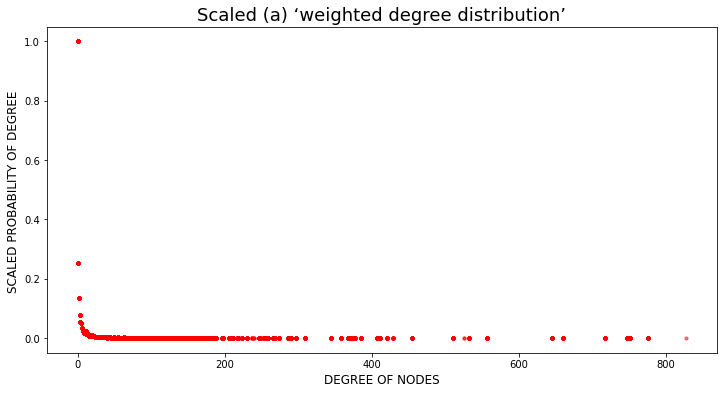

In [23]:


import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]

for key,value in  weighted_degree_frequncy.items(): 
    x_axis.append(key)
    y_axis.append(value/kmax)
    ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
     
plt.xlabel("DEGREE OF NODES", fontsize=12) 
plt.ylabel("SCALED PROBABILITY OF DEGREE ", fontsize=12) 
plt.title("Scaled (a) ‘weighted degree distribution’",fontsize=18) 
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  


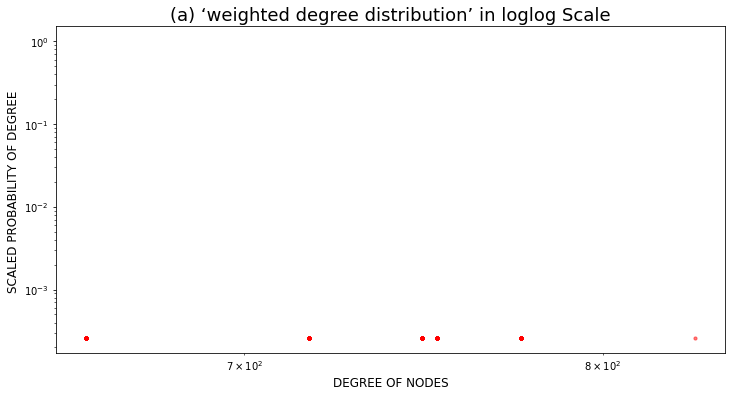

In [24]:

  #Loglog Scaled Degree Distribution

import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]
for key,value in  weighted_degree_frequncy.items():  
  x_axis.append(key)
  y_axis.append((value/kmax))
  ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
  plt.yscale('log')
  plt.xscale('log')
    
plt.xlabel("DEGREE OF NODES", fontsize=12) 
plt.ylabel("SCALED PROBABILITY OF DEGREE ", fontsize=12) 
plt.title("(a) ‘weighted degree distribution’ in loglog Scale",fontsize=18) 
plt.show() 

(b)cluster coefficient values:

It is defined as new fomula where li is the total sum of weight of edges of all nodes which are adjcent to node i and connected to one another, and weighted_degree_sum(i) is the weighted sum of all the connected edges of node i:

cluster_coefficient[i]=(2*li)/(weighted_degree_sum[i]*(weighted_degree_sum[i]-1))

In [17]:
cluster_coefficient={} #cluster coefficent is taken out for each nodes of the graph
for i in range(0,len(adjancency_matrix)):
  li=0
  for j in range(0,len(edge_list[i])):
    for k in range(j+1,len(edge_list[i])):
        li+=adjancency_matrix[edge_list[i][j]][edge_list[i][k]]
  if li!=0:
    cluster_coefficient[i]=(2*li)/(weighted_degree_sum[i]*(weighted_degree_sum[i]-1))
  else:
    cluster_coefficient[i]=0


In [18]:
cluster_coefficient = dict(sorted(cluster_coefficient.items(), key=lambda x: x[0]))
weighted_degree_sum= dict(sorted(weighted_degree_sum.items(), key=lambda x: x[0]))

following is the scalled graph

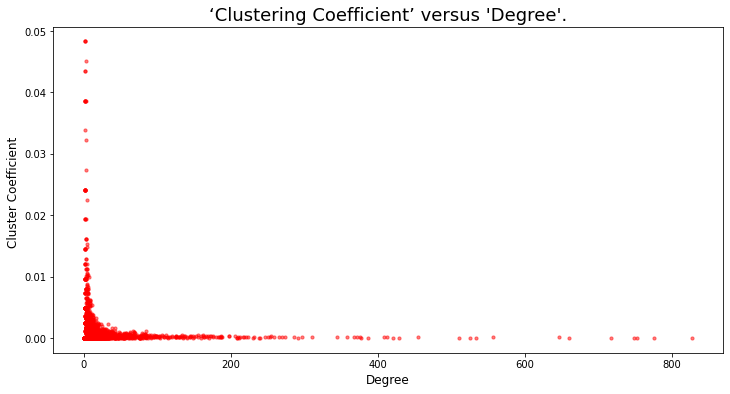

In [25]:
import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=list(weighted_degree_sum.values())
y_axis=list(cluster_coefficient.values())
for i in range(0,len(x_axis)):
  y_axis[i]=y_axis[i]/max(list(weighted_degree_sum.values()))
ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
     
plt.xlabel("Degree", fontsize=12) 
plt.ylabel("Cluster Coefficient ", fontsize=12) 
plt.title("‘Clustering Coefficient’ versus 'Degree'.",fontsize=18) 
plt.show() 